# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL (correct format with a placeholder for city)
url = f"http://api.openweathermap.org/data/2.5/weather?q={{city_name}}&appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url.format(city_name=city)

    # Log the URL, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the request and parse the JSON response
        city_weather = requests.get(city_url).json()

        # Check if the request was successful (status code 200)
        if city_weather["cod"] != 200:
            print(f"Error retrieving data for {city}. Skipping...")
            continue

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]  # UNIX timestamp

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except requests.exceptions.RequestException as e:
        print(f"Error with city {city}: {e}. Skipping...")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | belen
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | viedma
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | al khankah
Processing Record 9 of Set 1 | arua
Processing Record 10 of Set 1 | howard springs
Processing Record 11 of Set 1 | quellon
Processing Record 12 of Set 1 | badger
Processing Record 13 of Set 1 | san clemente
Processing Record 14 of Set 1 | vorgashor
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | severo-yeniseyskiy
Processing Record 17 of Set 1 | mazagao
Processing Record 18 of Set 1 | udachny
Processing Record 19 of Set 1 | kinwat
Processing Record 20 of Set 1 | torghay
Processing Record 21 of Set 1 | uliastay
Processing Record 22 of Set 1 | east london
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns =['City','Lat','Lng','Max Temp', 'Humidity','Cloudiness','Wind Speed','Country','Date'])

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,-23.58,77,75,3.09,CA,1734402326
1,ushuaia,-54.8000,-68.3000,9.81,81,0,1.54,AR,1734402413
2,belen,36.4891,36.2233,1.33,100,20,2.06,TR,1734402465
3,waitangi,-43.9535,-176.5597,15.46,88,100,1.34,NZ,1734402466
4,edinburgh of the seven seas,-37.0676,-12.3116,14.94,80,100,4.97,SH,1734402467


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-23.58,77,75,3.09,CA,1734402326
1,ushuaia,-54.8000,-68.3000,9.81,81,0,1.54,AR,1734402413
2,belen,36.4891,36.2233,1.33,100,20,2.06,TR,1734402465
3,waitangi,-43.9535,-176.5597,15.46,88,100,1.34,NZ,1734402466
4,edinburgh of the seven seas,-37.0676,-12.3116,14.94,80,100,4.97,SH,1734402467


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [36]:
def build_scatter(x,y):
    plt.scatter(city_data_df[x], city_data_df[y], c="blue", marker="X", edgecolor="black", linewidths=0.5)
    plt.tight_layout()
    plt.grid()

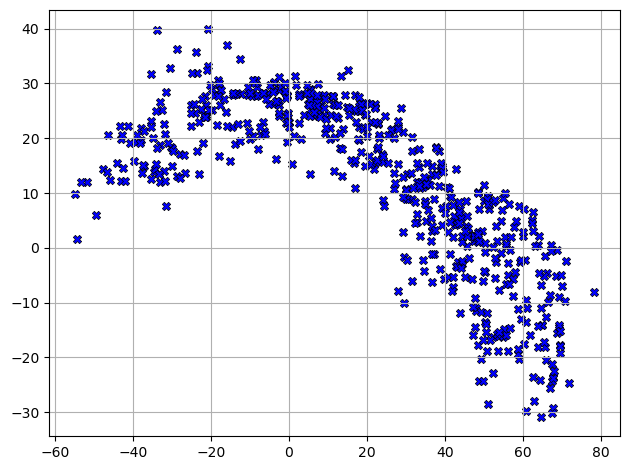

In [37]:
build_scatter("Lat", "Max Temp")

#### Latitude Vs. Humidity

Text(0.5, 1.0, 'City Latitude vs Humidity (2024-12-17)')

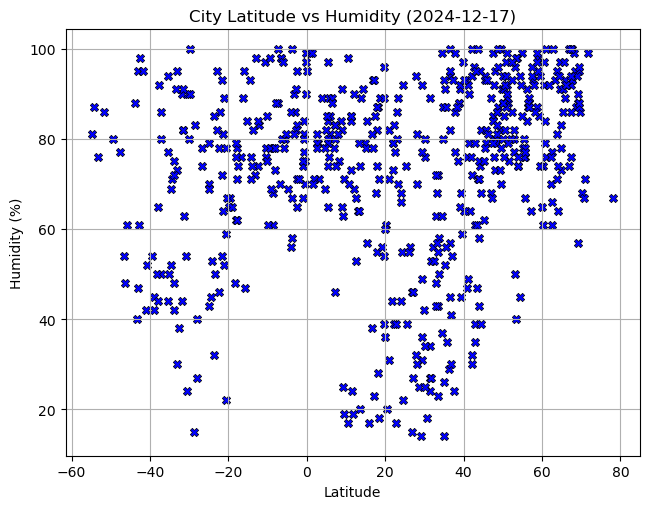

In [39]:
# Build the scatter plots for latitude vs. humidity
build_scatter("Lat", "Humidity")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")



#### Latitude Vs. Cloudiness

Text(0.5, 1.0, 'City Latitude vs Cloudiness (2024-12-17)')

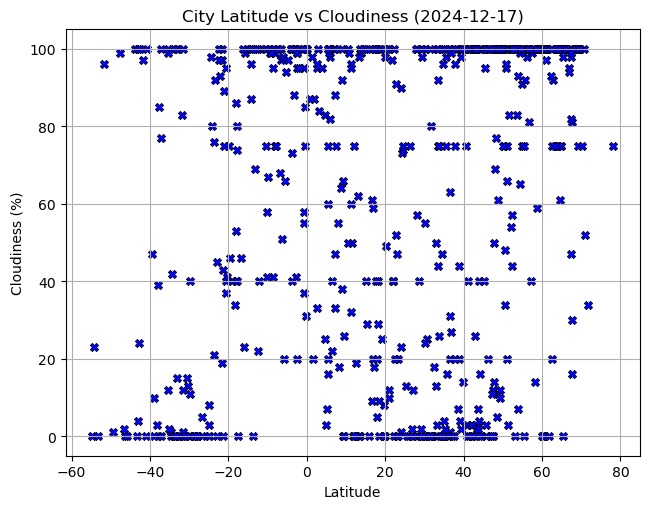

In [40]:
# Build the scatter plots for latitude vs. cloudiness
build_scatter("Lat", "Cloudiness")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")



#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs Wind Speed (2024-12-17)')

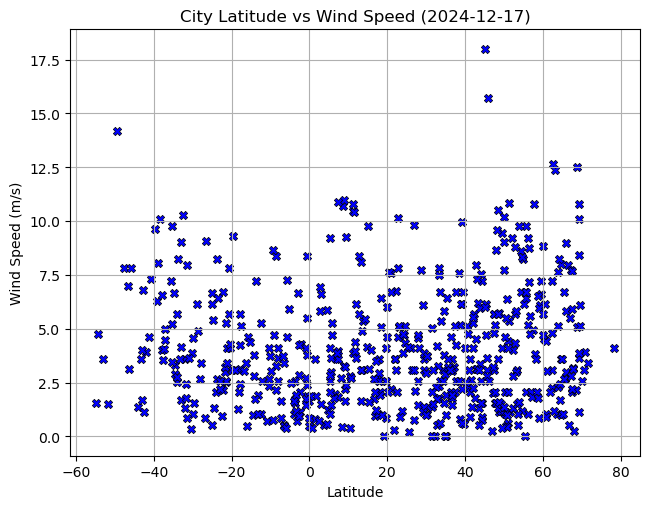

In [41]:
# Build the scatter plots for latitude vs. wind speed
build_scatter("Lat","Wind Speed")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")



---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
def linregress_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")
    print(f"The r-value is: {rvalue}")
    plt.scatter(x, y, c="blue", marker="X", edgecolor="black", linewidths=0.5)
    plt.plot(x,regress,"r")
    plt.annotate(line_eq,(x.min(),y.min()),color="r",fontsize=12)
    plt.tight_layout()

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-23.58,77,75,3.09,CA,1734402326
2,belen,36.4891,36.2233,1.33,100,20,2.06,TR,1734402465
7,al khankah,30.2104,31.3681,13.45,76,0,1.03,EG,1734402471
8,arua,3.0201,30.9111,19.87,71,84,1.52,UG,1734402472
11,badger,64.8000,-147.5333,-14.05,83,75,3.60,US,1734402476


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,9.81,81,0,1.54,AR,1734402413
3,waitangi,-43.9535,-176.5597,15.46,88,100,1.34,NZ,1734402466
4,edinburgh of the seven seas,-37.0676,-12.3116,14.94,80,100,4.97,SH,1734402467
5,viedma,-40.8135,-62.9967,19.15,52,100,7.33,AR,1734402468
6,port-aux-francais,-49.3500,70.2167,5.94,80,1,14.17,TF,1734402470


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8473607759301791


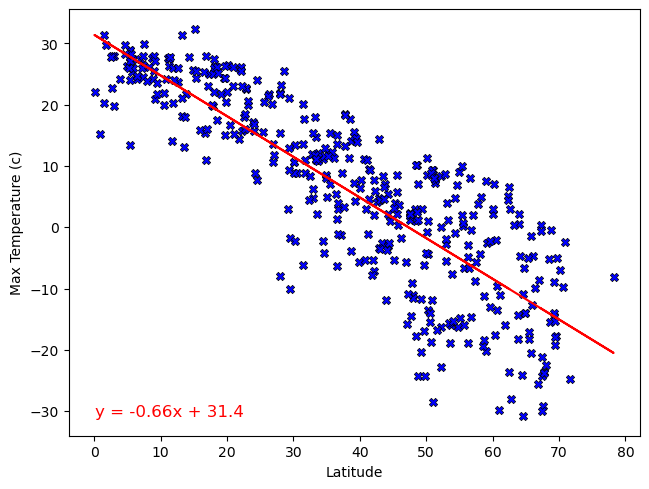

In [45]:
# Linear regression on Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.show()

The r-value is: 0.5634799297562398


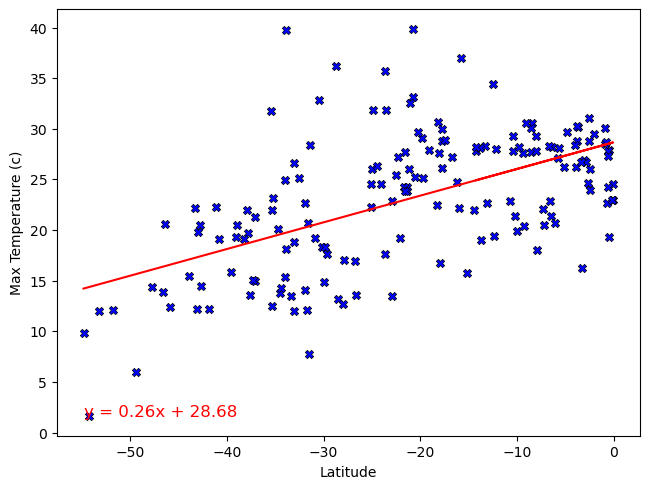

In [46]:
# Linear regression on Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.show()

**Discussion about the linear relationship:** 
- With an 'r-value' of -0.7 and 0.7, there's a strong correlation between the distance from the equator and the Max Temperature
- The northern hemisphere has a strong negative correlation
- The southern hemisphere has a strong positive correlation

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3064290500582124


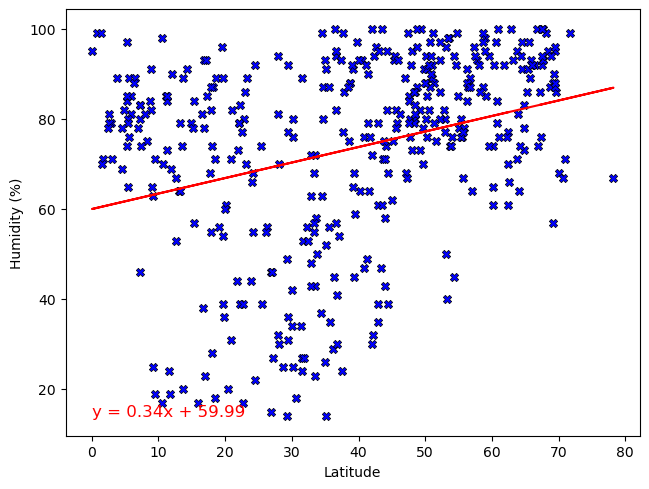

In [47]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

The r-value is: 0.28939703528256794


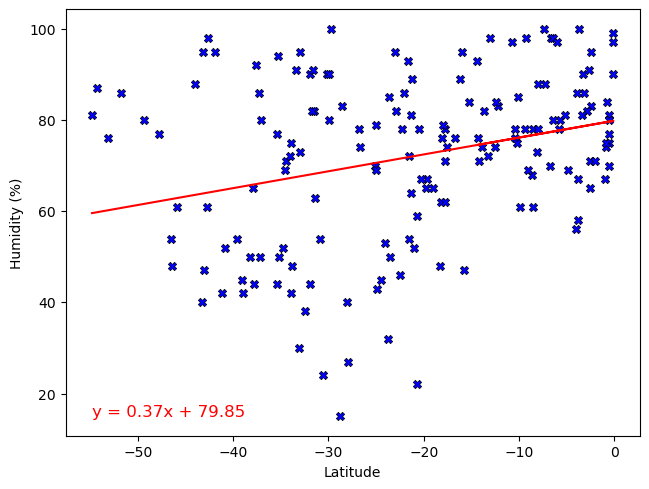

In [48]:
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

**Discussion about the linear relationship:** 
While there is little correlation between latitude and humidity, the scatter plots clearly show that cities located closer to the equator, both in the Northern and Southern Hemispheres, tend to have humidity levels above 60%. It would be interesting to examine the correlation between latitude and humidity for cities within 10 degrees north and south of the equator, as this range might reveal a stronger relationship without the influence of outliers from more extreme latitudes

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.24398947089319703


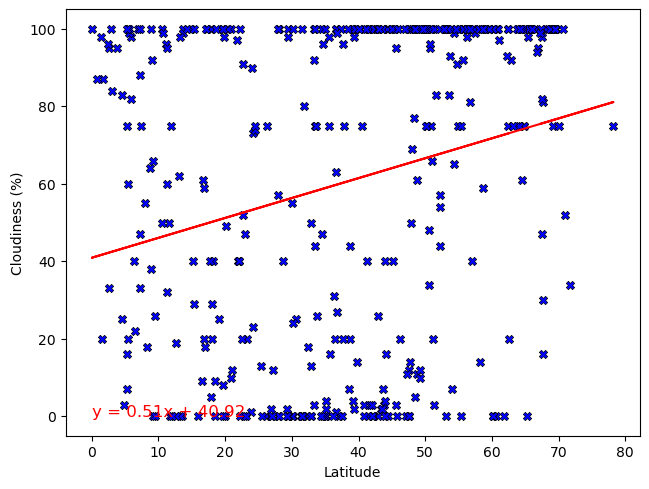

In [49]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

The r-value is: 0.46242569002636774


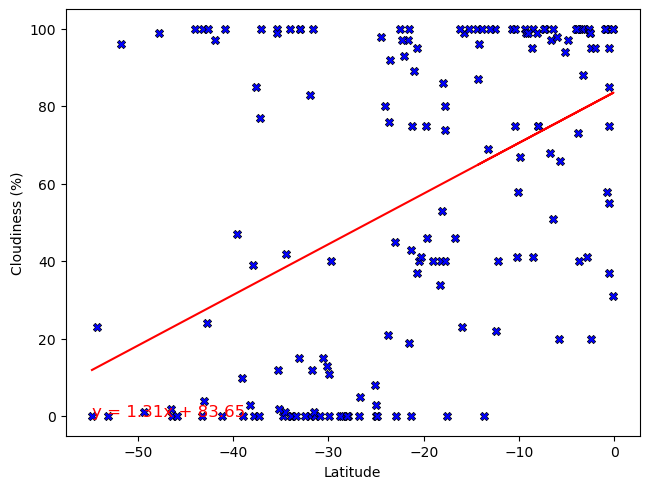

In [50]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.128323636731052


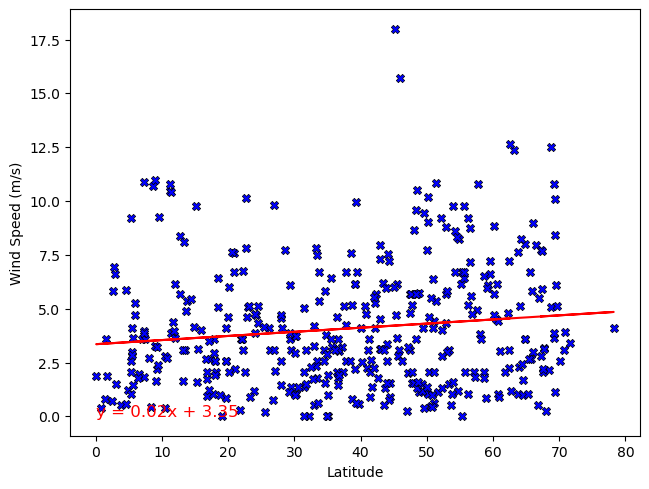

In [51]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

The r-value is: -0.3247179003606666


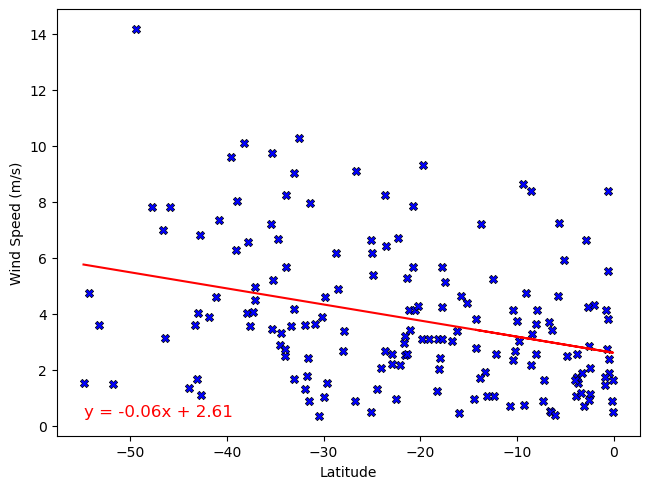

In [52]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

**Discussion about the linear relationship:** 
There is minimal correlation between wind speed and city latitude, both for cities in the Northern and Southern Hemispheres.